17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.6369 - loss: 0.6169 - val_accuracy: 0.8296 - val_loss: 0.4038
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8608 - loss: 0.3439 - val_accuracy: 0.8510 - val_loss: 0.3696
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.9057 - loss: 0.2532 - val_accuracy: 0.8696 - val_loss: 0.3176
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9338 - loss: 0.1910 - val_accuracy: 0.8638 - val_loss: 0.3521
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.9511 - loss: 0.1464 - val_accuracy: 0.8594 - val_loss: 0.3524
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9617 - loss: 0.1146 - val_accuracy: 0.8646 - val_loss: 0.3889
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9713 - loss: 0.0899 - val_accuracy: 0.8484 - val_loss: 0.5854
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.9536 - loss: 0.1359 - val

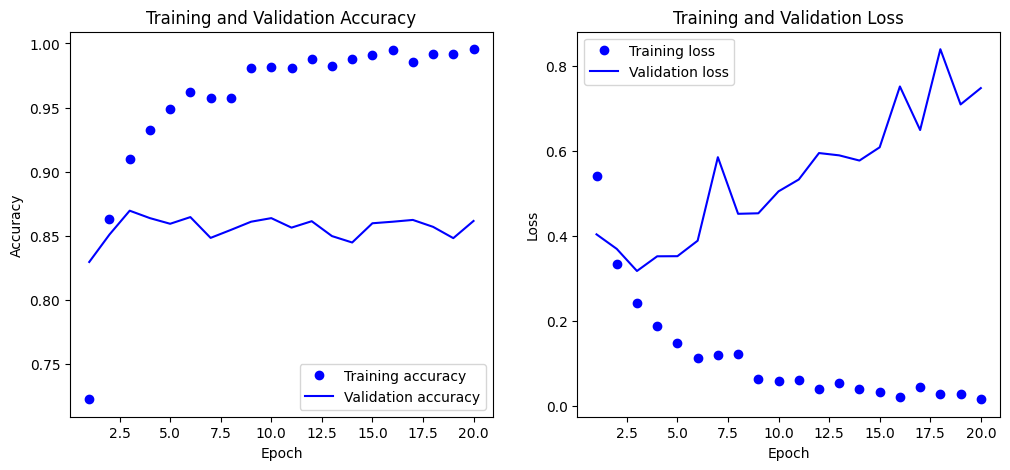

In [1]:
# Khai báo thư viện sử dụng
from keras.datasets import imdb
from keras.layers import LSTM, Embedding, Dense, Dropout, Bidirectional
from keras.models import Sequential
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Thiết lập các tham số
max_features = 10000  # Số từ tối đa trong tập dữ liệu
maxlen = 500          # Số từ tối đa trong mỗi câu
batch_size = 128      # Giảm kích thước batch để quá trình huấn luyện ổn định hơn

# Tải dữ liệu IMDB
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

# Xây dựng mô hình cải tiến
model = Sequential()
# Thêm lớp nhúng với kích thước embedding 128 và Dropout
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Dropout(0.2))
# Sử dụng Bidirectional LSTM với 64 đơn vị ở mỗi chiều
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
# Lớp Dense với hàm kích hoạt sigmoid cho đầu ra nhị phân
model.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình sử dụng Adam
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình với 20 epoch và validation_split=0.2
history = model.fit(input_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

# Đánh giá mô hình trên tập test
test_score = model.evaluate(input_test, y_test, verbose=1)
print("Test loss:", test_score[0])
print("Test accuracy:", test_score[1])

# Vẽ đồ thị accuracy và loss cho training và validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'bo', label='Training accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
